<h1 align='center' style="color:Green"> Lead Conversion Case Study</h1>



## Importing Necessary Library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#Library for Statistic and Machine learning
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

<h2 align="center" style="color:blue"> Step1: Reading and Understanding the Data </h2>

In [2]:
df = pd.read_csv('Leads.csv')

####  Generate summary statistics for the example dataframe

In [3]:
def generate_df_summary(df):
    # Calculate the percentage of unique values for each column
    unq_freq=[round((df[col].value_counts().max()/len(df))*100,2) for col in df.columns]
    
    # Calculate the percentage of "Select" values for each column
    sel_col = list(round((df.isin(["Select"]).sum()/len(df))*100,2))

    df_summary = pd.DataFrame(
        zip(
            df.columns,
            round((df.isnull().sum()/len(df))*100,2),
            df.nunique(),
            unq_freq,
            sel_col
            ),
        columns=["Col_Name","Null_Count%","unique_count","unq_freq%","sel_col%"],index=None
    )
    return df_summary



df_summary = generate_df_summary(df)

####  Condition Drop Column
#####  The below function takes in the dataframe summary and filters the columns based on certain conditions mentioned in the code. It returns a dataframe with the columns that need to be dropped.

In [4]:
def drop_columns(df_summary):
    drop_col = df_summary[(df_summary['Null_Count%'] >= 35)  | # Column with 40% or more null count exclude
                          (df_summary['unique_count'] == 1)  | # Column with only one unique feature
                          (df_summary['unq_freq%'] > 98)     | # Unique value Frequency more that 98% 
                          (df_summary['unq_freq%'] < 1)      | # Unique value Fequency in a column more than less 1%
                          (df_summary['sel_col%'] >= 40)     ]      # Word with "Select" is eqvalent to null 
    return drop_col

drop_col = drop_columns(df_summary)

drop_col

,Col_Name,Null_Count%,unique_count,unq_freq%,sel_col%
0,Prospect ID,0.00,9240,0.01,0.00
1,Lead Number,0.00,9240,0.01,0.00
5,Do Not Call,0.00,2,99.98,0.00
13,How did you hear about X Education,23.89,10,54.58,54.58
16,Search,0.00,2,99.85,0.00
17,Magazine,0.00,1,100.00,0.00
18,Newspaper Article,0.00,2,99.98,0.00
19,X Education Forums,0.00,2,99.99,0.00
20,Newspaper,0.00,2,99.99,0.00
21,Digital Advertisement,0.00,2,99.96,0.00


Below Graph Help to Understand 
* Uniq_frq%
* Null_Count%
* unique_count
* sel_col%

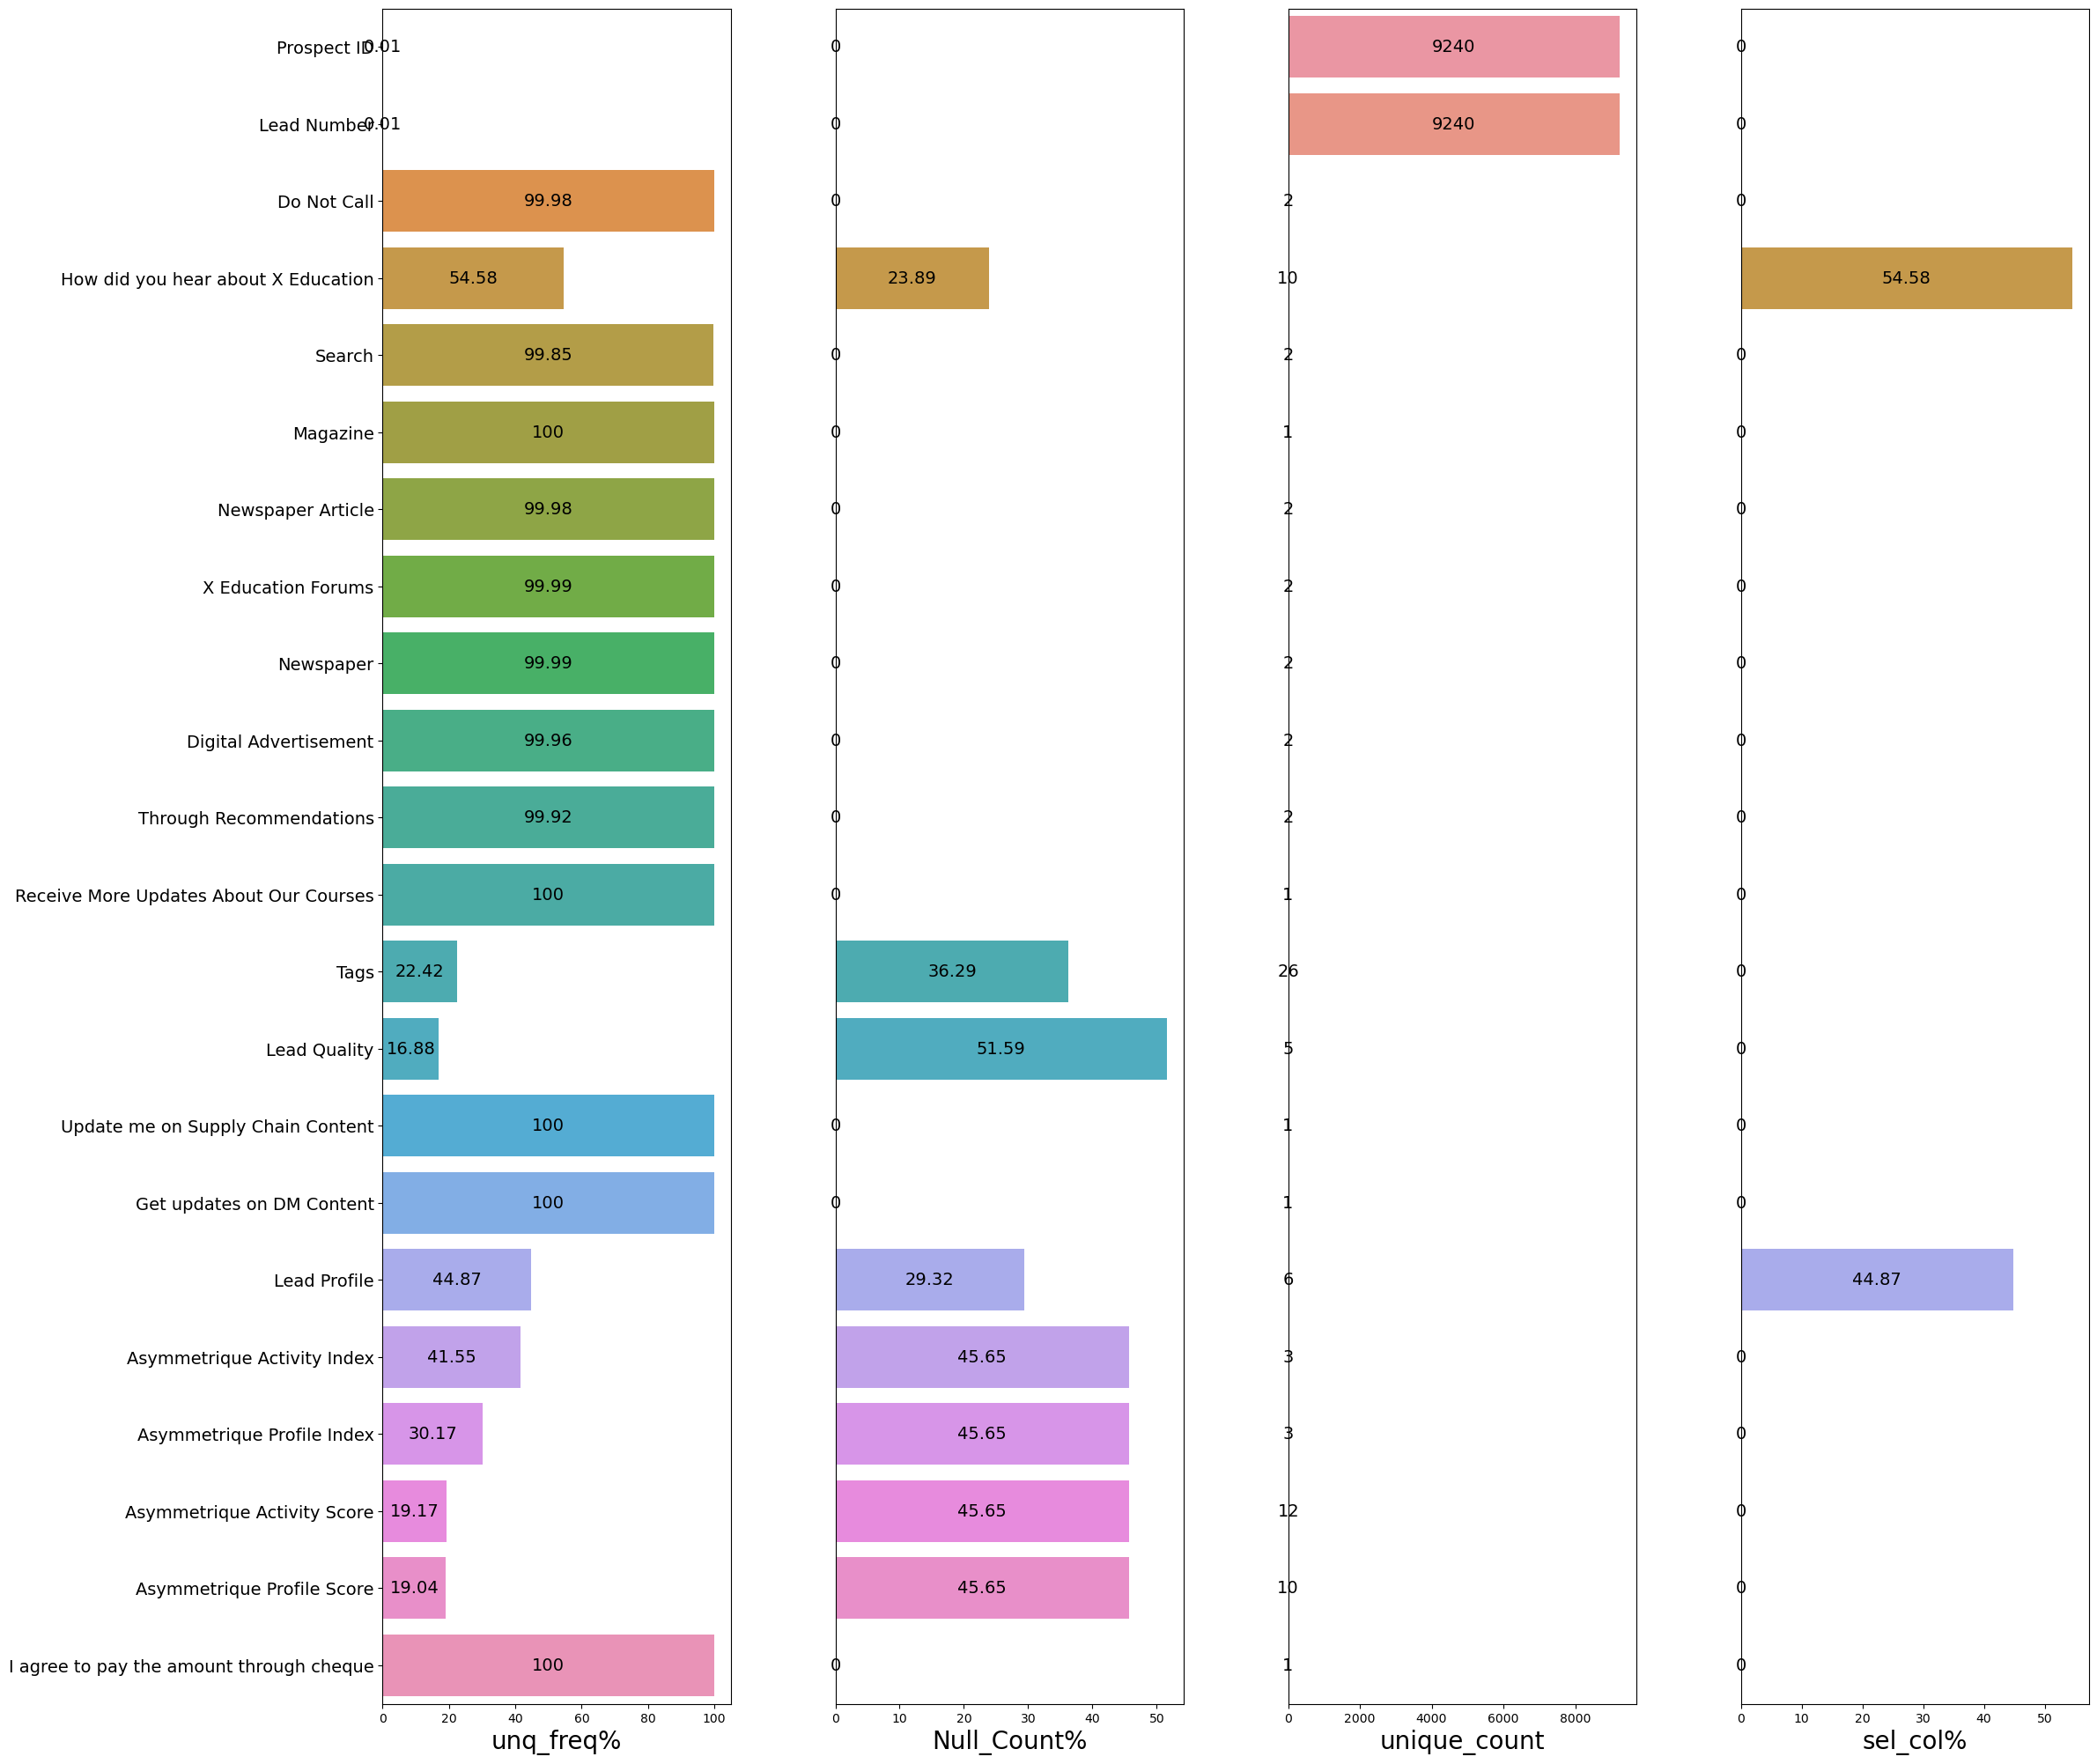

In [5]:


plt.figure(figsize=(25,25))
cols = [ 'unq_freq%', 'Null_Count%', 'unique_count','sel_col%']
for i, col in enumerate(cols):
    plt.subplot(1,4,i+1)
    ax = sns.barplot(y='Col_Name', x=col, data=drop_col, orient='h')
    if i == 0:
        plt.yticks(fontsize = 14)
    else:
        plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    plt.ylabel('')
    for j in ax.containers:
        ax.bar_label(j, label_type='center',fontsize =14)
    plt.xlabel(col,fontsize=20,loc='center')
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)    
plt.show()



<h2 align="center" style="color:blue">  Cleaning Data 

In [6]:
# Remove all above redudant column
df.drop(labels=drop_col['Col_Name'],axis=1,inplace=True)

In [7]:
#Lets Generate another summary
df_summary_imp = generate_df_summary(df)
df_summary_imp

,Col_Name,Null_Count%,unique_count,unq_freq%,sel_col%
0,Lead Origin,0.00,5,52.88,0.00
1,Lead Source,0.39,21,31.04,0.00
2,Do Not Email,0.00,2,92.06,0.00
3,Converted,0.00,2,61.46,0.00
4,TotalVisits,1.48,41,23.69,0.00
5,Total Time Spent on Website,0.00,1731,23.73,0.00
6,Page Views Per Visit,1.48,114,23.69,0.00
7,Last Activity,1.11,17,37.20,0.00
8,Country,26.63,38,70.26,0.00
9,Specialization,15.56,19,21.02,21.02


In [8]:
#  Specialization & City contains both "Select" & "Null" more than 35%
names=['Specialization','City']
df_summary_imp = df_summary_imp[~df_summary_imp.Col_Name.isin(names)]


# Generate Adusted New Data Frame
df = df[df_summary_imp['Col_Name']]

In [9]:
# Seperate Category & Numeric for imputation & feature Engineerin & analys
dtype = pd.DataFrame({'Col_Name': df.dtypes.index, 'dtype': df.dtypes.values})
df_summary_imp=df_summary_imp.merge(dtype,on='Col_Name')
df_summary_imp

,Col_Name,Null_Count%,unique_count,unq_freq%,sel_col%,dtype
0,Lead Origin,0.00,5,52.88,0.0,object
1,Lead Source,0.39,21,31.04,0.0,object
2,Do Not Email,0.00,2,92.06,0.0,object
3,Converted,0.00,2,61.46,0.0,int64
4,TotalVisits,1.48,41,23.69,0.0,float64
5,Total Time Spent on Website,0.00,1731,23.73,0.0,int64
6,Page Views Per Visit,1.48,114,23.69,0.0,float64
7,Last Activity,1.11,17,37.20,0.0,object
8,Country,26.63,38,70.26,0.0,object
9,What is your current occupation,29.11,6,60.61,0.0,object


### We are left with 12 Column

<h2 align="center" style="color:blue">  Imputation & EDA
    
    
### Category    

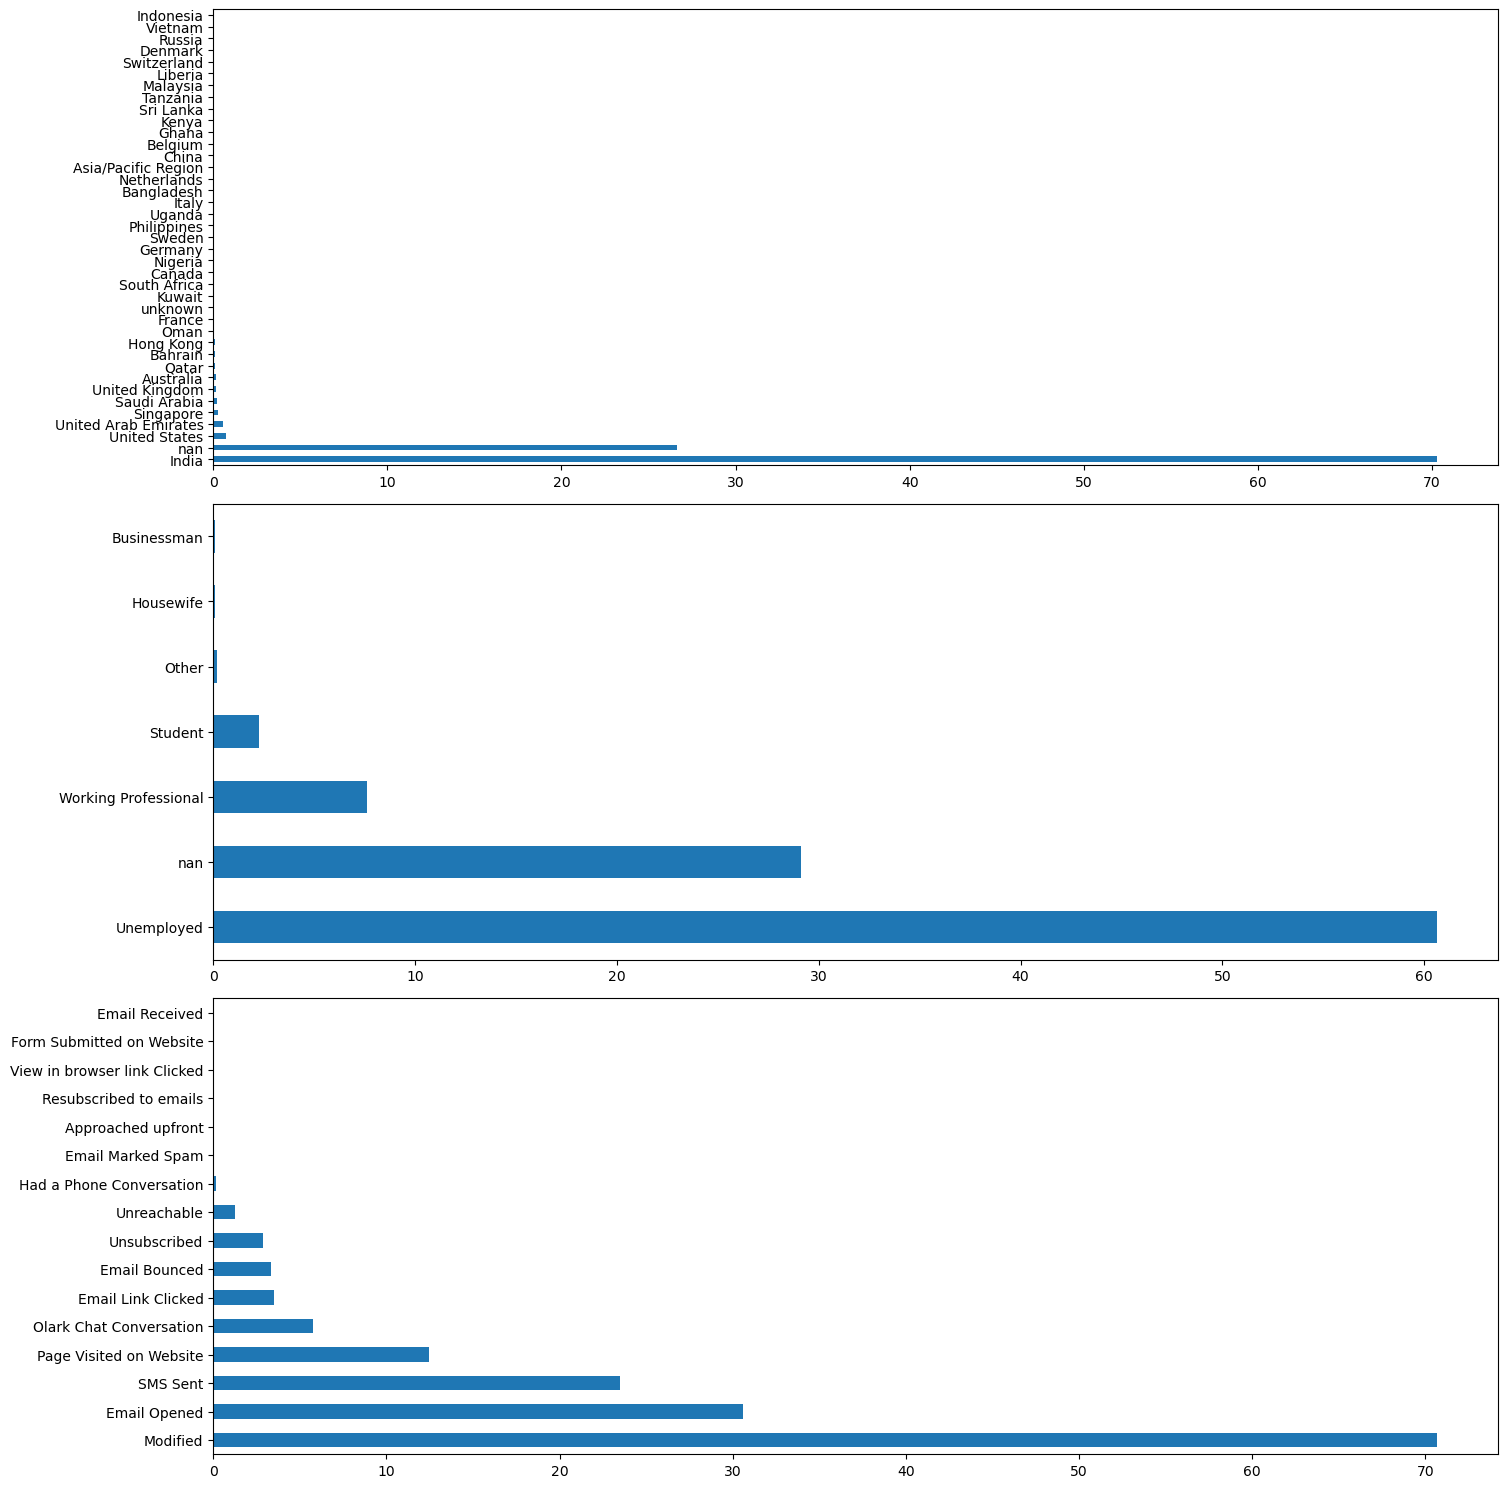

In [10]:
# Country #What is your current occupation #What matters most to you in choosing a course, are categorical column and need to be rewise

plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
round(df['Country'].value_counts(normalize=True,dropna=False)*100,2).plot.barh()
plt.subplot(3,1,2)
round(df['What is your current occupation'].value_counts(normalize=True,dropna=False)*100,2).plot.barh()
plt.subplot(3,1,3)
round(df['What matters most to you in choosing a course'].value_counts(normalize=True,dropna=False)*100,2).plot.barh()
plt.tight_layout()



# India makes  70% & nan make 27%  & 3% rest
# combine 27% as NotDefine and 3% Other Nationality


df['Country']=df['Country'].fillna("NotDefine") # fill na 

other_country = df[~df['Country'].isin(["India","NotDefine"])]['Country'].unique() # list of other country

df['Country']=df['Country'].apply(lambda x: 'Other_Country' if x in other_country else x) 

# Change current occupation with blank
df['What is your current occupation']=df['What is your current occupation'].fillna("Other")

# Fill blanck for "What matters most to you in choosing a course"
df['What matters most to you in choosing a course']=df['What matters most to you in choosing a course'].fillna("Other")
df['What matters most to you in choosing a course'].replace('Flexibility & Convenience','Other',inplace=True) # combile 

# Lead Activit
la = pd.DataFrame(df['Last Activity'].value_counts(dropna=False)<=110)
la = la[la['Last Activity']==True]
df['Last Activity']=df['Last Activity'].apply(lambda x: 'Other' if x in la.index else x)
round(df['Last Activity'].value_counts(normalize=True,dropna=False)*100,2).plot.barh()

#Lead  Source
round(df['Lead Source'].value_counts(normalize=True,dropna=False)*100,2).plot.barh()
df['Lead Source'].fillna('Other Sources',inplace=True)
ls = pd.DataFrame(df['Lead Source'].value_counts(dropna=False)<=110)
ls = ls[ls['Lead Source']==True]
df['Lead Source']=df['Lead Source'].apply(lambda x: 'Other Source' if x in ls.index else x)

#Last Notable Activity
round(df['Last Notable Activity'].value_counts(normalize=True,dropna=False)*100,2).plot.barh()
lna = pd.DataFrame(df['Last Notable Activity'].value_counts(dropna=False)<=100)
lna = lna[lna['Last Notable Activity']==True]
df['Last Notable Activity']=df['Last Notable Activity'].apply(lambda x: 'Other Activity' if x in lna.index else x)

### Numeric

In [11]:

df['TotalVisits']=df['TotalVisits'].fillna(df['TotalVisits'].median())
df['Page Views Per Visit']=df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median())

In [12]:
# Final Cleaned & Adusted output
df = df[df_summary_imp['Col_Name']]

In [13]:
df_summary_imp=generate_df_summary(df)
dtype = pd.DataFrame({'Col_Name': df.dtypes.index, 'dtype': df.dtypes.values})
df_summary_imp=df_summary_imp.merge(dtype,on='Col_Name')
df_summary_imp

,Col_Name,Null_Count%,unique_count,unq_freq%,sel_col%,dtype
0,Lead Origin,0.0,5,52.88,0.0,object
1,Lead Source,0.0,8,31.04,0.0,object
2,Do Not Email,0.0,2,92.06,0.0,object
3,Converted,0.0,2,61.46,0.0,int64
4,TotalVisits,0.0,41,23.69,0.0,float64
5,Total Time Spent on Website,0.0,1731,23.73,0.0,int64
6,Page Views Per Visit,0.0,114,23.69,0.0,float64
7,Last Activity,0.0,9,37.20,0.0,object
8,Country,0.0,3,70.26,0.0,object
9,What is your current occupation,0.0,6,60.61,0.0,object


In [19]:
df_summary_imp[df_summary_imp['dtype']!='object']["Col_Name"]

3                      Converted
4                    TotalVisits
5    Total Time Spent on Website
6           Page Views Per Visit
Name: Col_Name, dtype: object

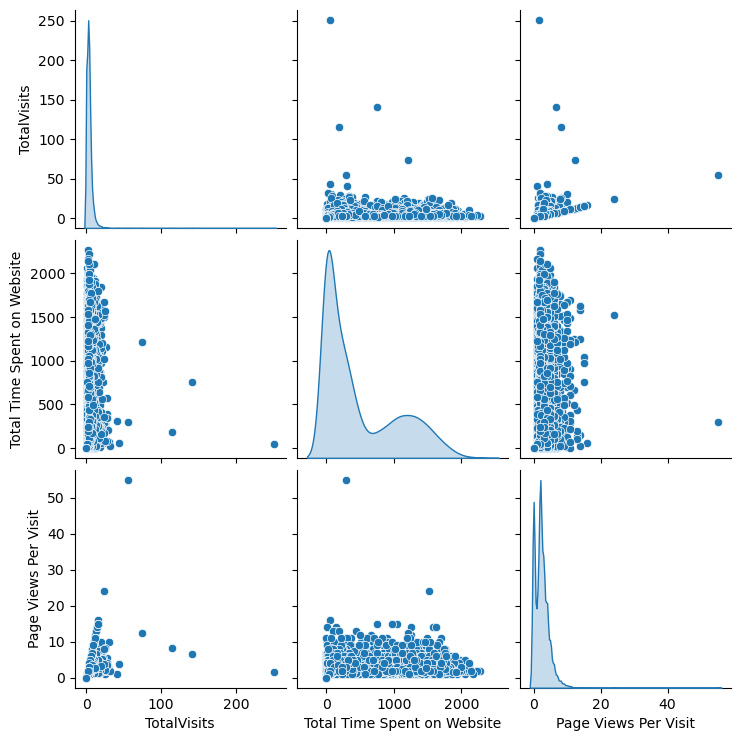

In [20]:

df_num = df_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

sns.pairplot(df_num,diag_kind='kde')
plt.show()

<h2 align="center" style="color:blue"> Creating Dummy Variable</h2>

In [14]:
df_summary_imp[df_summary_imp['dtype']=='object']["Col_Name"]

0                                       Lead Origin
1                                       Lead Source
2                                      Do Not Email
7                                     Last Activity
8                                           Country
9                   What is your current occupation
10    What matters most to you in choosing a course
11           A free copy of Mastering The Interview
12                            Last Notable Activity
Name: Col_Name, dtype: object

In [15]:
df_dummy = pd.get_dummies(df,drop_first=True)

In [16]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 39 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9240 non-null   int64  
 1   TotalVisits                                           9240 non-null   float64
 2   Total Time Spent on Website                           9240 non-null   int64  
 3   Page Views Per Visit                                  9240 non-null   float64
 4   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 5   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 6   Lead Origin_Lead Import                               9240 non-null   uint8  
 7   Lead Origin_Quick Add Form                            9240 non-null   uint8  
 8   Lead Source_Google                                    9240

<h2 align="center" style="color:blue">  Splitting the Data into Training & Testing </h2>

In [17]:
np.random.seed(0)
df_train, df_test = train_test_split(df_dummy,train_size=0.70,random_state=100)

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 39 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             6468 non-null   int64  
 1   TotalVisits                                           6468 non-null   float64
 2   Total Time Spent on Website                           6468 non-null   int64  
 3   Page Views Per Visit                                  6468 non-null   float64
 4   Lead Origin_Landing Page Submission                   6468 non-null   uint8  
 5   Lead Origin_Lead Add Form                             6468 non-null   uint8  
 6   Lead Origin_Lead Import                               6468 non-null   uint8  
 7   Lead Origin_Quick Add Form                            6468 non-null   uint8  
 8   Lead Source_Google                                    6

<h2 align="center" style="color:blue">  Rescaling the Features </h2>

In [21]:
#1. Instantiate an object
scaler = StandardScaler()

# create a list of numeric vars
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#2. Fit on Data
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Other,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1871,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
6795,0,0.100767,0.005716,-0.470569,1,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
3516,0,0.290067,-0.691418,0.070401,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
8105,0,0.290067,1.365219,1.226321,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3934,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [22]:
df_train.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Other,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,6468.000000,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.381262,-1.129448e-17,-1.609377e-16,-2.013438e-16,0.528139,0.079468,0.005102,0.000155,0.315863,0.190167,...,0.605133,0.077613,0.295145,0.311843,0.305349,0.367811,0.018553,0.016543,0.035869,0.237477
std,0.485734,1.000077e+00,1.000077e+00,1.000077e+00,0.499246,0.270489,0.071252,0.012434,0.464894,0.392463,...,0.488860,0.267582,0.456143,0.463282,0.460591,0.482247,0.134950,0.127561,0.185978,0.425570
min,0.000000,-6.564336e-01,-8.853708e-01,-1.085519e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-4.671335e-01,-8.634138e-01,-6.231508e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-8.853323e-02,-4.352528e-01,-1.607829e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.900670e-01,8.098906e-01,3.015850e-01,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,4.685790e+01,3.271816e+00,2.434472e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
y_train = df_train.pop('Converted')
X_train = df_train

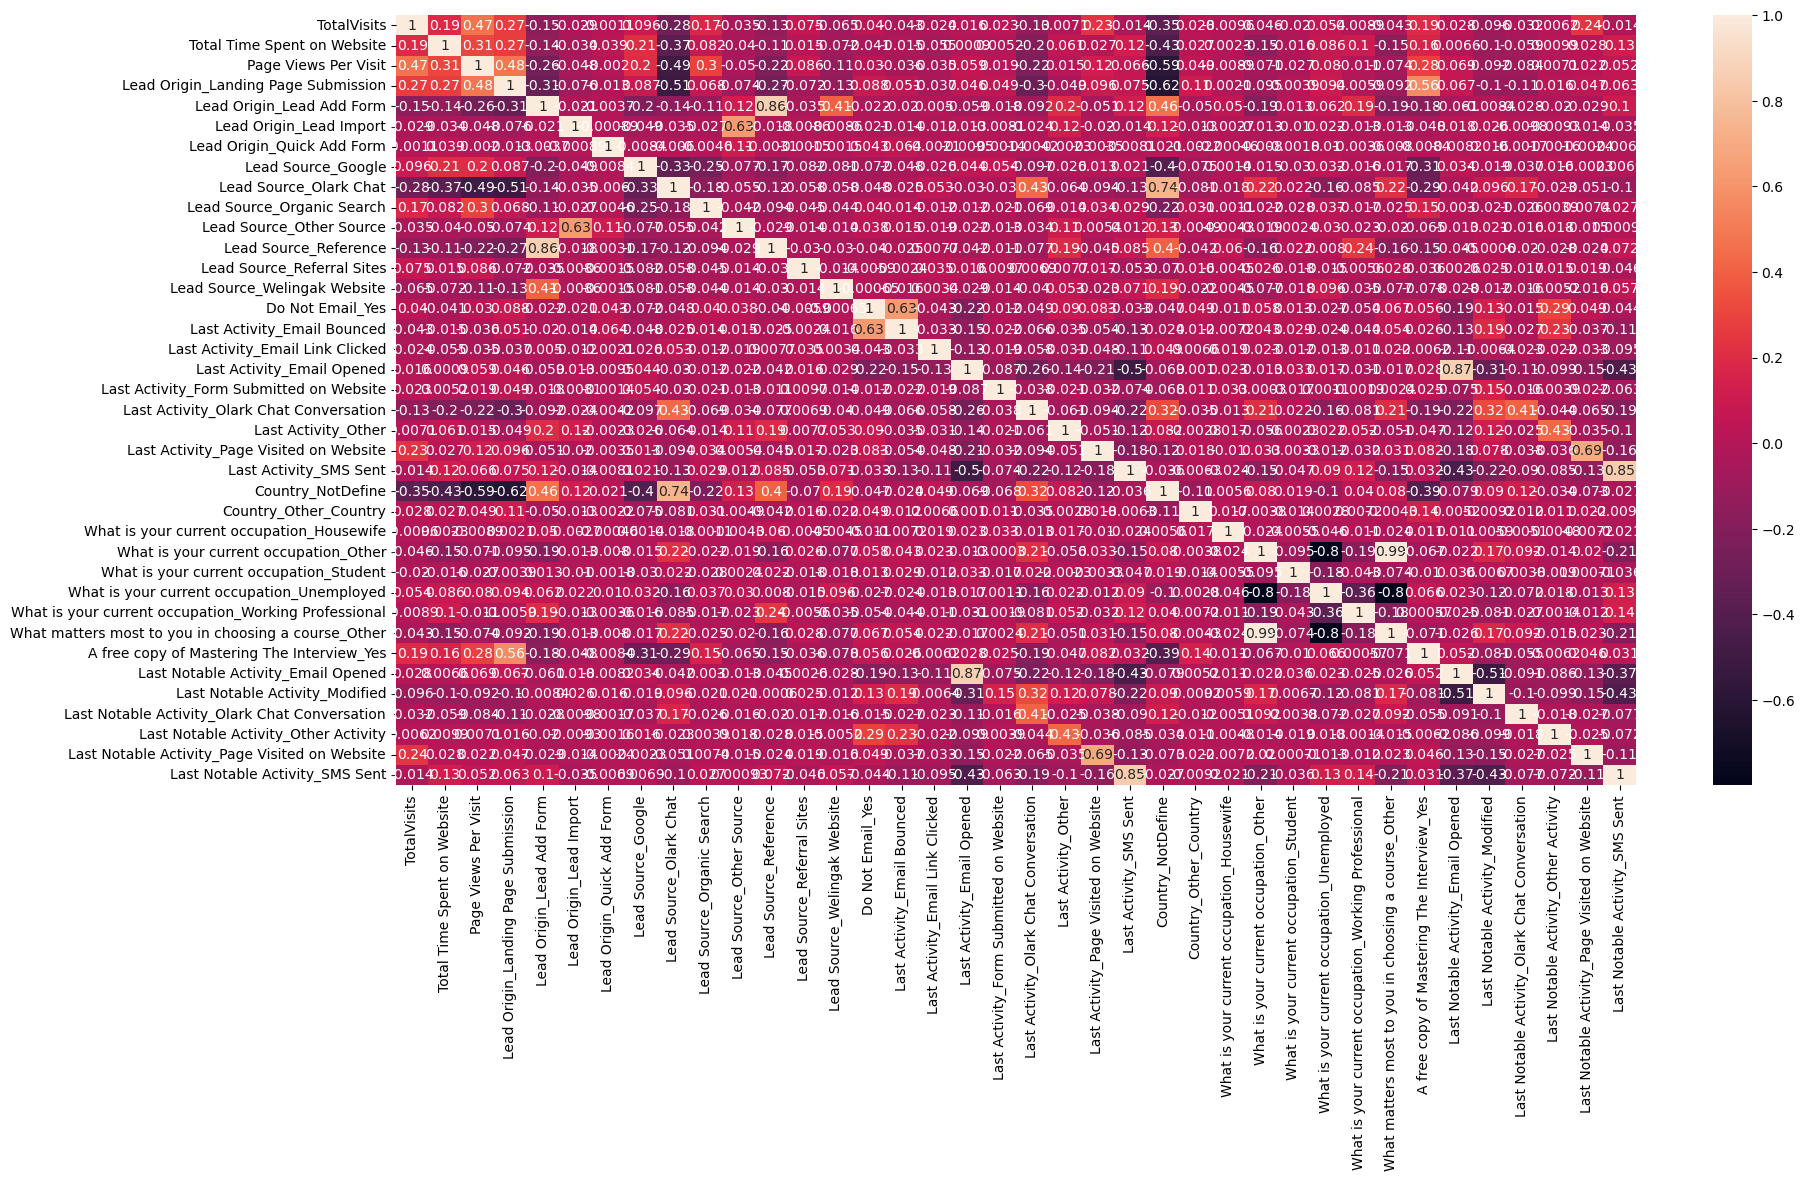

In [24]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_train.corr(),annot = True)
plt.show()

<h2 align="center" style="color:blue"> Model Building

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


logreg = LogisticRegression()

# Initialising and fitting the RFE for 15 variables
rfe = RFE(estimator=logreg,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [26]:
# Finding the result of RFE
rfe.support_

array([False,  True, False, False,  True, False, False, False,  True,
       False, False, False, False,  True,  True,  True, False,  True,
       False, False, False, False,  True, False, False,  True, False,
        True,  True,  True,  True, False, False, False, False,  True,
       False,  True])

In [27]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 18),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 20),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 9),
 ('Lead Origin_Quick Add Form', False, 7),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 19),
 ('Lead Source_Other Source', False, 15),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 17),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 11),
 ('Last Activity_Olark Chat Conversation', False, 4),
 ('Last Activity_Other', False, 12),
 ('Last Activity_Page Visited on Website', False, 13),
 ('Last Activity_SMS Sent', True, 1),
 ('Country_NotDefin

In [28]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other Source',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_Page Visited on Website', 'Country_NotDefine',
       'Country_Other_Country', 'What is your current occupation_Other',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [29]:
X_train_rfe = X_train[col]

In [30]:
#Creating function to calculate variance Inflation Factor

def calVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = "VIF",ascending = False)
    return vif

<h2 align="center" style="color:blue">Model 1</h2>

In [31]:
print(calVIF(X_train_rfe))
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
lr_model = lr.fit()
print(lr_model.summary())

                                             Features   VIF
7                              Last Activity_SMS Sent  5.93
14                     Last Notable Activity_SMS Sent  4.93
10         What is your current occupation_Unemployed  3.13
6                          Last Activity_Email Opened  2.36
4                                    Do Not Email_Yes  1.94
12  What matters most to you in choosing a course_...  1.94
5                         Last Activity_Email Bounced  1.79
2                              Lead Source_Olark Chat  1.55
1                           Lead Origin_Lead Add Form  1.49
11  What is your current occupation_Working Profes...  1.43
0                         Total Time Spent on Website  1.25
3                        Lead Source_Welingak Website  1.24
13               Last Notable Activity_Other Activity  1.14
9             What is your current occupation_Student  1.07
8           What is your current occupation_Housewife  1.01
                 Generalized Linear Mode

<h2 align="center" style="color:blue">Model 2</h2>

In [32]:
X_train_1 = X_train_rfe.drop(["What is your current occupation_Housewife"], axis = 1)
print(calVIF(X_train_1))
X_train_sm = sm.add_constant(X_train_1)
lr = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
lr_model = lr.fit()
print(lr_model.summary())

                                             Features   VIF
7                              Last Activity_SMS Sent  5.93
13                     Last Notable Activity_SMS Sent  4.93
9          What is your current occupation_Unemployed  3.12
6                          Last Activity_Email Opened  2.35
4                                    Do Not Email_Yes  1.94
11  What matters most to you in choosing a course_...  1.94
5                         Last Activity_Email Bounced  1.79
2                              Lead Source_Olark Chat  1.55
1                           Lead Origin_Lead Add Form  1.48
10  What is your current occupation_Working Profes...  1.42
0                         Total Time Spent on Website  1.25
3                        Lead Source_Welingak Website  1.24
12               Last Notable Activity_Other Activity  1.14
8             What is your current occupation_Student  1.07
                 Generalized Linear Model Regression Results                  
Dep. Variable:       

<h2 align="center" style="color:blue">Model 3</h2>

In [33]:
X_train_2 = X_train_1.drop(["What is your current occupation_Student"], axis = 1)
print(calVIF(X_train_2))
X_train_sm = sm.add_constant(X_train_2)
lr = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
lr_model = lr.fit()
print(lr_model.summary())

                                             Features   VIF
7                              Last Activity_SMS Sent  5.88
12                     Last Notable Activity_SMS Sent  4.93
8          What is your current occupation_Unemployed  2.99
6                          Last Activity_Email Opened  2.24
4                                    Do Not Email_Yes  1.94
10  What matters most to you in choosing a course_...  1.89
5                         Last Activity_Email Bounced  1.79
2                              Lead Source_Olark Chat  1.53
1                           Lead Origin_Lead Add Form  1.47
9   What is your current occupation_Working Profes...  1.40
0                         Total Time Spent on Website  1.25
3                        Lead Source_Welingak Website  1.24
11               Last Notable Activity_Other Activity  1.14
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Mo

<h2 align="center" style="color:blue">Model 4</h2>

In [34]:
X_train_3 = X_train_2.drop(["What is your current occupation_Unemployed"], axis = 1)
print(calVIF(X_train_3))
X_train_sm = sm.add_constant(X_train_3)
lr = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
lr_model = lr.fit()
print(lr_model.summary())

                                             Features   VIF
7                              Last Activity_SMS Sent  5.19
11                     Last Notable Activity_SMS Sent  4.92
4                                    Do Not Email_Yes  1.89
5                         Last Activity_Email Bounced  1.77
1                           Lead Origin_Lead Add Form  1.44
9   What matters most to you in choosing a course_...  1.41
2                              Lead Source_Olark Chat  1.40
0                         Total Time Spent on Website  1.24
3                        Lead Source_Welingak Website  1.24
6                          Last Activity_Email Opened  1.22
8   What is your current occupation_Working Profes...  1.18
10               Last Notable Activity_Other Activity  1.12
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:         

<h2 align="center" style="color:blue">Model 5</h2>

In [35]:
X_train_4 = X_train_3.drop(["Last Activity_SMS Sent"], axis = 1)
print(calVIF(X_train_4))
X_train_sm = sm.add_constant(X_train_4)
lr = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
lr_model = lr.fit()
print(lr_model.summary())

                                             Features   VIF
4                                    Do Not Email_Yes  1.88
5                         Last Activity_Email Bounced  1.75
1                           Lead Origin_Lead Add Form  1.42
2                              Lead Source_Olark Chat  1.40
8   What matters most to you in choosing a course_...  1.34
0                         Total Time Spent on Website  1.24
3                        Lead Source_Welingak Website  1.24
6                          Last Activity_Email Opened  1.21
10                     Last Notable Activity_SMS Sent  1.20
7   What is your current occupation_Working Profes...  1.18
9                Last Notable Activity_Other Activity  1.12
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df 

<h2 align="center" style="color:blue">Model Metrics</h2>

In [36]:
lr_model.params

const                                                  -1.647787
Total Time Spent on Website                             1.103417
Lead Origin_Lead Add Form                               3.585113
Lead Source_Olark Chat                                  1.132042
Lead Source_Welingak Website                            1.979662
Do Not Email_Yes                                       -1.176249
Last Activity_Email Bounced                            -1.135137
Last Activity_Email Opened                              0.650017
What is your current occupation_Working Professional    2.525783
What matters most to you in choosing a course_Other    -1.051563
Last Notable Activity_Other Activity                    2.090592
Last Notable Activity_SMS Sent                          1.911402
dtype: float64

In [37]:
y_train_pred =lr_model.predict(X_train_sm).values.reshape(-1)

In [38]:
y_train_pred[:20]

array([0.30097457, 0.27062325, 0.34781671, 0.85446036, 0.30097457,
       0.99219354, 0.14147524, 0.98485235, 0.11600495, 0.91999951,
       0.88763528, 0.40364946, 0.15235161, 0.51409261, 0.08949187,
       0.13076355, 0.13076355, 0.00372138, 0.13076355, 0.23701181])

In [39]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID
0,0,0.300975,1871
1,0,0.270623,6795
2,0,0.347817,3516
3,0,0.854460,8105
4,0,0.300975,3934


In [40]:
y_train_pred_final['predicted']  = y_train_pred_final.Conversion_Prob.map(lambda x : 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted
0,0,0.300975,1871,0
1,0,0.270623,6795,0
2,0,0.347817,3516,0
3,0,0.854460,8105,1
4,0,0.300975,3934,0


In [41]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8140074211502782


In [42]:
# Confusion Metric
cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)

In [43]:
# Defining a function to print important metrics of our model
def model_metrics(cm):
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]

    print('Accuracy: %.6f' %((TP+TN)/(TP+FP+TN+FN)))
    print('Sensitivity: %.6f' %(TP/(TP+FN)))
    print('Specificity: %.6f' %(TN/(TN+FP)))
    print('FPR: %.6f' %(FP/(TN+FP)))# False Positive rate
    print('PPV: %.6f' %(TP/(TP+FP))) # Postive predictive rate
    print('NPV: %.6f' %(TN/(TN+FN))) # Negative predictive rate
    
model_metrics(cm)

Accuracy: 0.814007
Sensitivity: 0.692620
Specificity: 0.888806
FPR: 0.111194
PPV: 0.793312
NPV: 0.824334


###  Plotting the ROC Curv

In [44]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [45]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

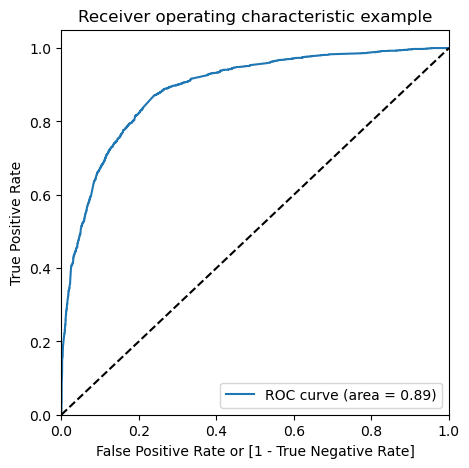

In [46]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Finding the optimal threshold

In [47]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.300975,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.270623,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.347817,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.854460,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.300975,3934,0,1,1,1,1,0,0,0,0,0,0


In [48]:
# Creating a dataframe with accuracy, sensitivity and specificity and their corresponding threshold values
cutoff_df = pd.DataFrame(columns = ['prob','accu','sensi','speci'])
n = [float(x)/10 for x in range(10)]

for i in n:
    cmi = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total = sum(sum(cmi))
    accu = (cmi[0,0]+cmi[1,1])/total
    speci = cmi[0,0]/(cmi[0,0]+cmi[0,1])
    sensi = cmi[1,1]/(cmi[1,0]+cmi[1,1])
    cutoff_df.loc[i] = [i, accu, sensi, speci]

cutoff_df

,prob,accu,sensi,speci
0.0,0.0,0.381262,1.000000,0.000000
0.1,0.1,0.617656,0.972019,0.399300
0.2,0.2,0.766234,0.907137,0.679410
0.3,0.3,0.802566,0.870235,0.760870
0.4,0.4,0.814626,0.768045,0.843328
0.5,0.5,0.814007,0.692620,0.888806
0.6,0.6,0.808287,0.632198,0.916792
0.7,0.7,0.784014,0.521898,0.945527
0.8,0.8,0.763605,0.431062,0.968516
0.9,0.9,0.718460,0.281833,0.987506


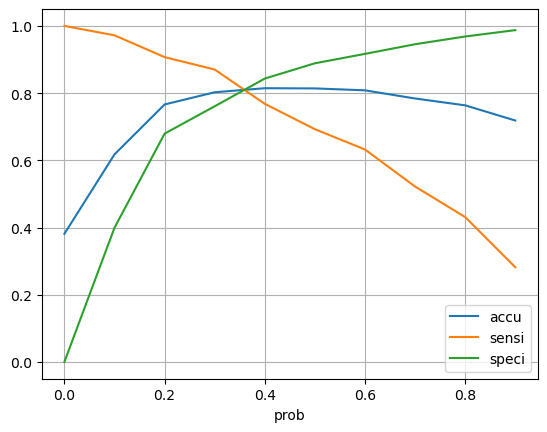

In [49]:
# Plotting to find the optimal cutoff point
cutoff_df.plot.line(x='prob', y=['accu','sensi','speci']);
plt.grid()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [50]:
# Predicting the 'Converted' using 0.35 as the threshold value
y_train_pred_final['final_Predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.300975,1871,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.270623,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.347817,3516,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.854460,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.300975,3934,0,1,1,1,1,0,0,0,0,0,0,0


In [51]:
# Calculating the 'Lead_Score'
y_train_pred_final['Lead_Score'] = y_train_pred_final['Conversion_Prob'].map(lambda x: round(x*100))

In [52]:
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
0,0,0.300975,1871,0,1,1,1,1,0,0,0,0,0,0,0,30
1,0,0.270623,6795,0,1,1,1,0,0,0,0,0,0,0,0,27
2,0,0.347817,3516,0,1,1,1,1,0,0,0,0,0,0,0,35
3,0,0.854460,8105,1,1,1,1,1,1,1,1,1,1,0,1,85
4,0,0.300975,3934,0,1,1,1,1,0,0,0,0,0,0,0,30


In [53]:
#New confusion Matrics
cm2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
cm2

array([[3257,  745],
       [ 487, 1979]], dtype=int64)

In [54]:
model_metrics(cm2)

Accuracy: 0.809524
Sensitivity: 0.802514
Specificity: 0.813843
FPR: 0.186157
PPV: 0.726505
NPV: 0.869925


In [55]:
# Finding the precision and recall o
print('Precision: %.3f' %(metrics.precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)))
print('Recall: %.3f' %(metrics.recall_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)))

Precision: 0.727
Recall: 0.803


<h2 align="center" style="color:blue"> Model Evaluation

In [56]:
y_test = df_test.pop('Converted')
X_test = df_test

In [59]:
# Scaling the continuous numerical columns in the test set using 'transform'
n_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_test[n_cols] = scaler.transform(X_test[n_cols])
X_test.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Other,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.0,2772.000000,2772.000000,2772.000000,...,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,-0.018331,0.023314,0.014954,0.530303,0.073593,0.007937,0.0,0.297619,0.189394,0.133838,...,0.608225,0.073593,0.289683,0.314214,0.307359,0.370851,0.022727,0.019120,0.031025,0.229437
std,0.663506,1.008922,0.973467,0.499171,0.261155,0.088749,0.0,0.457294,0.391892,0.340540,...,0.488235,0.261155,0.453697,0.464286,0.461483,0.483120,0.149060,0.136971,0.173415,0.420547
min,-0.656434,-0.885371,-1.085519,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.467133,-0.861584,-0.623151,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.088533,-0.413296,-0.160783,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.290067,0.851060,0.532769,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,9.565774,3.237051,6.312368,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
X_test = X_test[X_train_4.columns]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Opened,What is your current occupation_Working Professional,What matters most to you in choosing a course_Other,Last Notable Activity_Other Activity,Last Notable Activity_SMS Sent
4269,0.964504,0,0,0,0,0,0,0,1,0,1
2376,-0.885371,1,0,0,0,0,0,0,0,0,1
7766,-0.777416,0,0,0,0,0,0,1,0,1,0
9199,-0.885371,0,1,0,0,0,0,0,0,0,0
4359,-0.885371,1,0,0,0,0,1,0,0,0,0


In [61]:
# Adding the constant to the test data
X_test_sm = sm.add_constant(X_test)

# Predicting the test data using our final model
y_test_pred = lr_model.predict(X_test_sm)

In [62]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.reset_index(drop=True, inplace=True)
y_test_df = pd.DataFrame(y_test)
y_test_df['Prospect ID'] = y_test_df.index
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred],axis=1)
y_pred_final.rename(columns={0:'Conversion_prob'}, inplace=True)
y_pred_final['final_Predicted'] = y_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final['Lead_Score'] = y_pred_final['Conversion_prob'].map(lambda x: round(x*100))
y_pred_final.head()

,Converted,Prospect ID,Conversion_prob,final_Predicted,Lead_Score
0,1,4269,0.568640,1,57
1,1,2376,0.946434,1,95
2,1,7766,0.891946,1,89
3,0,9199,0.183520,0,18
4,1,4359,0.833468,1,83


In [63]:
#Confusion metrics
cm_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted)
print(cm_test)

[[1372  305]
 [ 221  874]]


In [64]:
model_metrics(cm_test)

Accuracy: 0.810245
Sensitivity: 0.798174
Specificity: 0.818128
FPR: 0.181872
PPV: 0.741306
NPV: 0.861268


In [65]:
# Finding the precision and recall of the test predictions
print('Precision: %.3f'%(metrics.precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)))
print('Recall: %.3f'%(metrics.recall_score(y_pred_final.Converted , y_pred_final.final_Predicted)))

Precision: 0.741
Recall: 0.798


<h2 align="center" style="color:blue">Summary</h2>
After running the model on the Train and Test Data evaluation metrics meet the goals of X-Education CEO, which is to achieve 80% target lead conversion rate to be around 80%.

#### Evaluation Metrics are:-
##### Train Data:
* Accuracy: 0.809524
* Sensitivity: 0.802514
* Specificity: 0.813843
* FPR: 0.186157
* PPV: 0.726505
* NPV: 0.869925
    
##### Test Data:
* Accuracy: 0.810245
* Sensitivity: 0.798174
* Specificity: 0.818128
* FPR: 0.181872
* PPV: 0.741306
* NPV: 0.861268

<h2 align="center" style="color:blue">Recommendation:

In [68]:
lr_model.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               3.585113
What is your current occupation_Working Professional    2.525783
Last Notable Activity_Other Activity                    2.090592
Lead Source_Welingak Website                            1.979662
Last Notable Activity_SMS Sent                          1.911402
Lead Source_Olark Chat                                  1.132042
Total Time Spent on Website                             1.103417
Last Activity_Email Opened                              0.650017
What matters most to you in choosing a course_Other    -1.051563
Last Activity_Email Bounced                            -1.135137
Do Not Email_Yes                                       -1.176249
const                                                  -1.647787
dtype: float64

1. `Lead Add Form `, `What is your current occupation_Working Professional` & `Lead Source_Welingak Website `  have higest conversion value
 